<a href="https://colab.research.google.com/github/PavanVkAlapati/Bike_Assignment_Upgrad/blob/main/assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
import time

# Load MNIST dataset
def load_data():
    tfm = transforms.Compose([transforms.ToTensor()])

    train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=tfm)
    test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=tfm)

    X_train, Y_train = train.data.view(train.data.size(0), -1).float() / 255, train.targets
    X_test, Y_test = test.data.view(test.data.size(0), -1).float() / 255, test.targets

    return X_train.T, Y_train, X_test.T, Y_test

# One-hot encode labels
def one_hot(Y, num_cls):
    Y_enc = torch.zeros(num_cls, Y.size(0))
    Y_enc[Y, torch.arange(Y.size(0))] = 1
    return Y_enc

# Initialize parameters
def init_params(inp_size, hid_size, out_size):
    W1 = torch.randn(hid_size, inp_size) * 0.01
    b1 = torch.zeros((hid_size, 1))
    W2 = torch.randn(out_size, hid_size) * 0.01
    b2 = torch.zeros((out_size, 1))
    return W1, b1, W2, b2

# Activation functions
def relu(Z):
    return torch.maximum(Z, torch.tensor(0.0))

def softmax(Z):
    expZ = torch.exp(Z - torch.max(Z))
    return expZ / expZ.sum(axis=0, keepdim=True)

# Cross-entropy loss
def cross_entropy(A2, Y):
    m = Y.shape[1]
    return (-torch.log(A2[Y.argmax(dim=0), torch.arange(m)])).sum() / m

# Forward pass
def forward(X, W1, b1, W2, b2):
    Z1, A1 = torch.matmul(W1, X) + b1, relu(torch.matmul(W1, X) + b1)
    Z2, A2 = torch.matmul(W2, A1) + b2, softmax(torch.matmul(W2, A1) + b2)
    return Z1, A1, Z2, A2

# Backward pass
def backward(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    dZ2, dW2, db2 = A2 - Y, torch.matmul(A2 - Y, A1.T) / m, torch.sum(A2 - Y, axis=1, keepdim=True) / m
    dZ1 = torch.matmul(W2.T, dZ2) * (Z1 > 0)
    dW1, db1 = torch.matmul(dZ1, X.T) / m, torch.sum(dZ1, axis=1, keepdim=True) / m
    return dW1, db1, dW2, db2

# Update parameters
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

# Evaluate model
def evaluate(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    return (torch.argmax(A2, dim=0) == Y.argmax(dim=0)).float().mean().item()

# Train model using mini-batch SGD
def train(X_train, Y_train, X_test, Y_test, inp_size, hid_size, out_size, epochs, batch, lr):
    W1, b1, W2, b2 = init_params(inp_size, hid_size, out_size)

    for ep in range(epochs):
        for i in range(X_train.shape[1] // batch):
            X_b, Y_b = X_train[:, i * batch : (i + 1) * batch], Y_train[:, i * batch : (i + 1) * batch]
            Z1, A1, Z2, A2 = forward(X_b, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = backward(X_b, Y_b, Z1, A1, A2, W2)
            W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        if (ep + 1) in [25, 50, 100, 150]:
            train_acc, test_acc = evaluate(X_train, Y_train, W1, b1, W2, b2), evaluate(X_test, Y_test, W1, b1, W2, b2)
            print(f"Epoch {ep + 1}: Train Acc: {train_acc * 100:.2f}%, Test Acc: {test_acc * 100:.2f}%")

    return W1, b1, W2, b2

# Main function
def main():
    X_train, Y_train, X_test, Y_test = load_data()
    Y_train, Y_test = one_hot(Y_train, 10), one_hot(Y_test, 10)

    inp_size, hid_size, out_size, epochs, lr = 784, 100, 10, 150, 0.01

    print("Training SGD (batch=1)")
    sgd_start = time.time()
    train(X_train, Y_train, X_test, Y_test, inp_size, hid_size, out_size, epochs, batch=1, lr=lr)
    print(f"SGD done in {time.time() - sgd_start:.2f}s.\n")

    print("Training Mini-Batch SGD (batch=10)")
    mini_start = time.time()
    train(X_train, Y_train, X_test, Y_test, inp_size, hid_size, out_size, epochs, batch=10, lr=lr)
    print(f"Mini-Batch SGD done in {time.time() - mini_start:.2f}s.\n")

if __name__ == "__main__":
    main()


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 8.94MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.38MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training SGD (batch=1)
Epoch 25: Train Acc: 100.00%, Test Acc: 98.10%
Epoch 50: Train Acc: 100.00%, Test Acc: 98.12%
Epoch 100: Train Acc: 100.00%, Test Acc: 98.08%
Epoch 150: Train Acc: 100.00%, Test Acc: 98.11%
SGD done in 3769.53s.

Training Mini-Batch SGD (batch=10)
Epoch 25: Train Acc: 99.02%, Test Acc: 97.77%
Epoch 50: Train Acc: 99.77%, Test Acc: 97.86%
Epoch 100: Train Acc: 100.00%, Test Acc: 97.90%
Epoch 150: Train Acc: 100.00%, Test Acc: 97.99%
Mini-Batch SGD done in 532.68s.



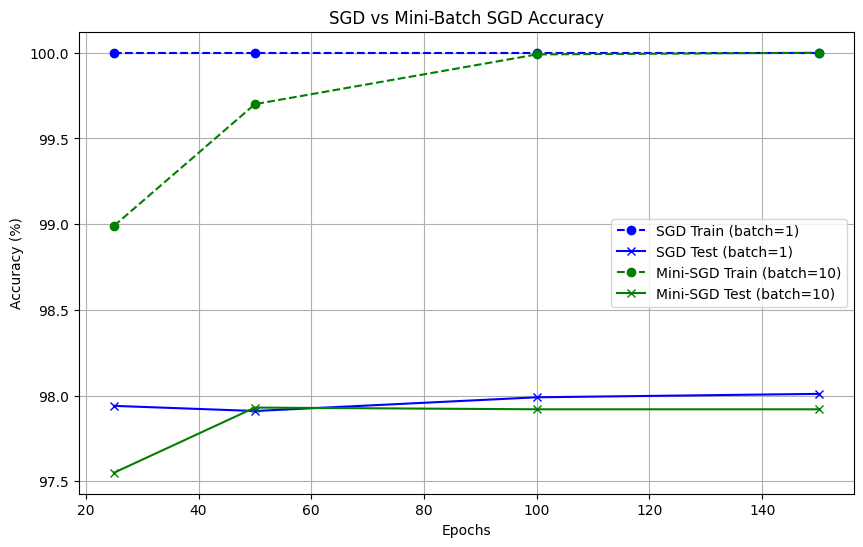

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the accuracy comparison between SGD and Mini-Batch SGD
def plot_acc(train_sgd, test_sgd, train_mini, test_mini):
    # Extract epochs and accuracies
    sgd_ep_train, sgd_train_acc = zip(*train_sgd)
    sgd_ep_test, sgd_test_acc = zip(*test_sgd)

    mini_ep_train, mini_train_acc = zip(*train_mini)
    mini_ep_test, mini_test_acc = zip(*test_mini)

    # Plot accuracies
    plt.figure(figsize=(10, 6))

    # SGD accuracy
    plt.plot(sgd_ep_train, sgd_train_acc, label="SGD Train (batch=1)", marker="o", linestyle="--", color="b")
    plt.plot(sgd_ep_test, sgd_test_acc, label="SGD Test (batch=1)", marker="x", linestyle="-", color="b")

    # Mini-Batch SGD accuracy
    plt.plot(mini_ep_train, mini_train_acc, label="Mini-SGD Train (batch=10)", marker="o", linestyle="--", color="g")
    plt.plot(mini_ep_test, mini_test_acc, label="Mini-SGD Test (batch=10)", marker="x", linestyle="-", color="g")

    # Titles and labels
    plt.title("SGD vs Mini-Batch SGD Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Accuracy data
train_sgd = [(25, 100.00), (50, 100.00), (100, 100.00), (150, 100.00)]
test_sgd = [(25, 97.94), (50, 97.91), (100, 97.99), (150, 98.01)]

train_mini = [(25, 98.99), (50, 99.70), (100, 99.99), (150, 100.00)]
test_mini = [(25, 97.55), (50, 97.93), (100, 97.92), (150, 97.92)]

# Call plot function
plot_acc(train_sgd, test_sgd, train_mini, test_mini)


Training Data Samples:
Showing images...


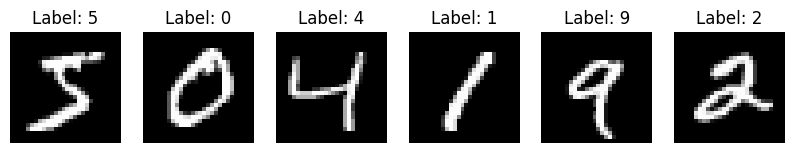

Test Data Samples:
Showing images...


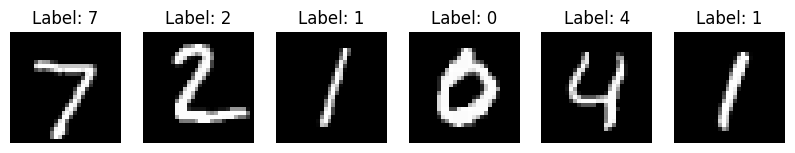

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize dataset images
def show_imgs(X, Y, n=6):
    print("Showing images...")
    plt.figure(figsize=(10, 5))
    for i in range(n):
        img, lbl = X[:, i].reshape(28, 28), Y[i].item()
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {lbl}")
        plt.axis("off")
    plt.show()

# Load dataset and visualize images
X_tr, Y_tr, X_te, Y_te = load_data()

# Show training images
print("Training Data Samples:")
show_imgs(X_tr, Y_tr)

# Show test images
print("Test Data Samples:")
show_imgs(X_te, Y_te)

Training with 25 hidden neurons...
Epoch 25: Train Acc: 97.38%, Test Acc: 96.29%
Epoch 50: Train Acc: 98.21%, Test Acc: 96.38%
Epoch 100: Train Acc: 98.81%, Test Acc: 96.16%
Epoch 150: Train Acc: 99.17%, Test Acc: 95.98%
Final Test Accuracy with 25 neurons: 95.98%
Training with 50 hidden neurons...
Epoch 25: Train Acc: 98.50%, Test Acc: 97.29%
Epoch 50: Train Acc: 99.40%, Test Acc: 97.46%
Epoch 100: Train Acc: 99.87%, Test Acc: 97.49%
Epoch 150: Train Acc: 99.99%, Test Acc: 97.59%
Final Test Accuracy with 50 neurons: 97.59%
Training with 100 hidden neurons...
Epoch 25: Train Acc: 98.96%, Test Acc: 97.64%
Epoch 50: Train Acc: 99.72%, Test Acc: 97.81%
Epoch 100: Train Acc: 99.99%, Test Acc: 97.96%
Epoch 150: Train Acc: 100.00%, Test Acc: 97.94%
Final Test Accuracy with 100 neurons: 97.94%
Training with 150 hidden neurons...
Epoch 25: Train Acc: 99.08%, Test Acc: 97.74%
Epoch 50: Train Acc: 99.83%, Test Acc: 98.00%
Epoch 100: Train Acc: 99.99%, Test Acc: 98.05%
Epoch 150: Train Acc: 100.0

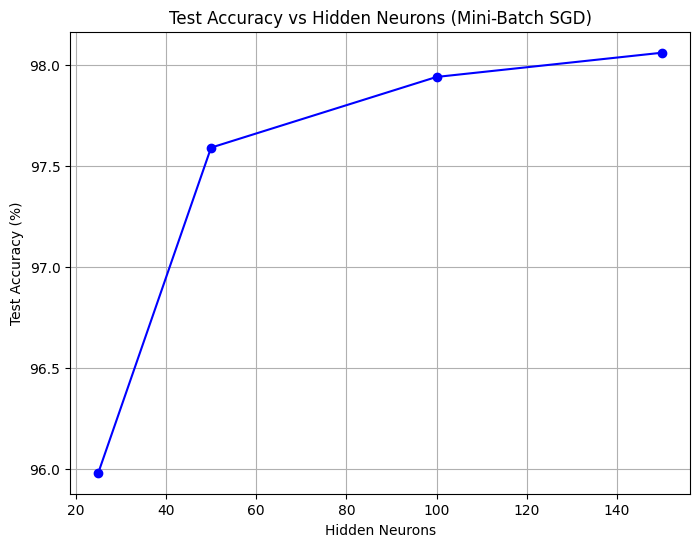

In [ ]:
import matplotlib.pyplot as plt

def exp_neurons():
    # Load data
    X_tr, Y_tr, X_te, Y_te = load_data()
    Y_tr, Y_te = one_hot(Y_tr, 10), one_hot(Y_te, 10)

    # Hyperparameters
    inp_size, out_size, epochs, lr = 784, 10, 150, 0.01
    hid_sizes = [25, 50, 100, 150]
    test_accs = []

    for hid_size in hid_sizes:
        print(f"Training with {hid_size} hidden neurons...")

        # Train the model with Mini-Batch SGD (batch_size=10)
        W1, b1, W2, b2 = train(X_tr, Y_tr, X_te, Y_te, inp_size, hid_size, out_size, epochs, batch=10, lr=lr)

        # Evaluate model and store accuracy
        acc = evaluate(X_te, Y_te, W1, b1, W2, b2)
        test_accs.append(acc * 100)
        print(f"Final Test Accuracy with {hid_size} neurons: {acc * 100:.2f}%")

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.plot(hid_sizes, test_accs, marker="o", linestyle="-", color="b")
    plt.title("Test Accuracy vs Hidden Neurons (Mini-Batch SGD)")
    plt.xlabel("Hidden Neurons")
    plt.ylabel("Test Accuracy (%)")
    plt.grid(True)
    plt.show()

# Run the experiment
exp_neurons()

Training with ReLU
Epoch 25: Test Accuracy = 97.62%
Epoch 50: Test Accuracy = 97.81%
Epoch 75: Test Accuracy = 97.86%
Epoch 100: Test Accuracy = 97.90%
Epoch 125: Test Accuracy = 97.91%
Epoch 150: Test Accuracy = 97.90%
Training with tanh
Epoch 25: Test Accuracy = 97.27%
Epoch 50: Test Accuracy = 97.77%
Epoch 75: Test Accuracy = 97.89%
Epoch 100: Test Accuracy = 97.87%
Epoch 125: Test Accuracy = 97.96%
Epoch 150: Test Accuracy = 97.97%


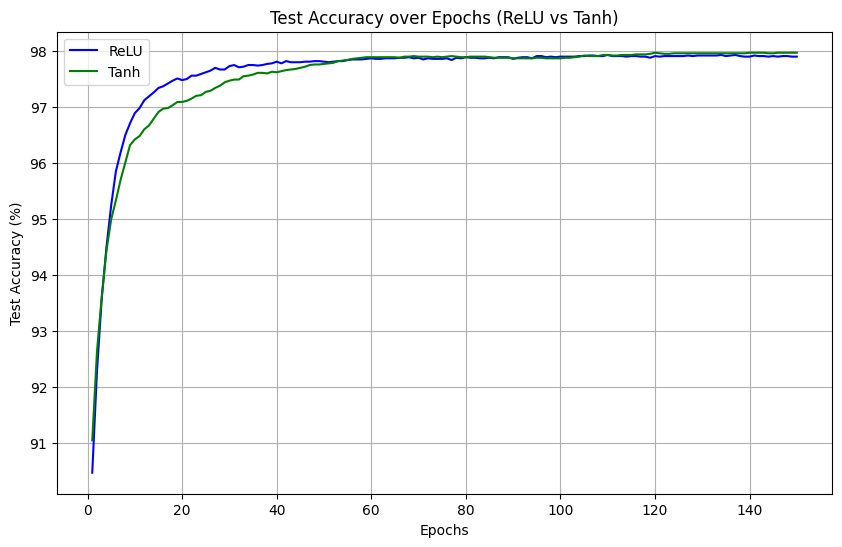

In [ ]:
# Activation functions
def relu(Z):
    return torch.maximum(Z, torch.tensor(0.0))

def tanh(Z):
    return torch.tanh(Z)

# Softmax function
def softmax(Z):
    expZ = torch.exp(Z - torch.max(Z))
    return expZ / expZ.sum(axis=0, keepdim=True)

# Initialize weights & biases
def init_params(inp, hid, out):
    W1, b1 = torch.randn(hid, inp) * 0.01, torch.zeros((hid, 1))
    W2, b2 = torch.randn(out, hid) * 0.01, torch.zeros((out, 1))
    return W1, b1, W2, b2

# Load MNIST dataset
def load_data():
    from torchvision import datasets, transforms
    tfm = transforms.Compose([transforms.ToTensor()])

    train = datasets.MNIST(root='./data', train=True, download=True, transform=tfm)
    test = datasets.MNIST(root='./data', train=False, download=True, transform=tfm)

    X_tr, Y_tr = train.data.view(train.data.size(0), -1).float() / 255, train.targets
    X_te, Y_te = test.data.view(test.data.size(0), -1).float() / 255, test.targets

    return X_tr.T, Y_tr, X_te.T, Y_te

# One-hot encoding
def one_hot(Y, num_classes):
    Y_one_hot = torch.zeros(num_classes, Y.size(0))
    Y_one_hot[Y, torch.arange(Y.size(0))] = 1
    return Y_one_hot

# Forward pass
def forward(X, W1, b1, W2, b2, act_fn):
    Z1 = torch.matmul(W1, X) + b1
    A1 = act_fn(Z1)
    Z2 = torch.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Cross-entropy loss function
def cross_entropy_loss(A2, Y):
    m = Y.shape[1]
    log_probs = -torch.log(A2[Y.argmax(dim=0), torch.arange(m)])
    return log_probs.sum() / m

# Evaluate model accuracy
def eval_model(X, Y, W1, b1, W2, b2, act_fn):
    _, _, _, A2 = forward(X, W1, b1, W2, b2, act_fn)
    preds = torch.argmax(A2, dim=0)
    return (preds == Y.argmax(dim=0)).float().mean().item()

# Train model using Mini-Batch SGD with specified activation function
def train_model_act(X_tr, Y_tr, X_te, Y_te, inp, hid, out, ep, batch, lr, act_fn):
    W1, b1, W2, b2 = init_params(inp, hid, out)
    test_accs = []

    for epoch in range(ep):
        for i in range(X_tr.shape[1] // batch):
            X_b, Y_b = X_tr[:, i * batch : (i + 1) * batch], Y_tr[:, i * batch : (i + 1) * batch]
            Z1, A1, Z2, A2 = forward(X_b, W1, b1, W2, b2, act_fn)

            # Compute gradients
            dZ2, dW2, db2 = A2 - Y_b, torch.matmul(A2 - Y_b, A1.T) / batch, torch.sum(A2 - Y_b, axis=1, keepdim=True) / batch
            dA1 = torch.matmul(W2.T, dZ2)
            dZ1 = dA1 * (Z1 > 0) if act_fn == relu else dA1 * (1 - torch.tanh(Z1)**2)
            dW1, db1 = torch.matmul(dZ1, X_b.T) / batch, torch.sum(dZ1, axis=1, keepdim=True) / batch

            # Update parameters
            W1, b1, W2, b2 = W1 - lr * dW1, b1 - lr * db1, W2 - lr * dW2, b2 - lr * db2

        # Evaluate model at each epoch
        acc = eval_model(X_te, Y_te, W1, b1, W2, b2, act_fn)
        test_accs.append(acc * 100)

        if (epoch + 1) % 25 == 0:
            print(f"Epoch {epoch + 1}: Test Accuracy = {acc * 100:.2f}%")

    return test_accs

# Experiment to compare ReLU vs Tanh
def exp_relu_tanh():
    X_tr, Y_tr, X_te, Y_te = load_data()
    Y_tr, Y_te = one_hot(Y_tr, 10), one_hot(Y_te, 10)

    inp, hid, out, ep, lr, batch = 784, 100, 10, 150, 0.01, 10

    print("Training with ReLU")
    relu_acc = train_model_act(X_tr, Y_tr, X_te, Y_te, inp, hid, out, ep, batch, lr, relu)

    print("Training with tanh")
    tanh_acc = train_model_act(X_tr, Y_tr, X_te, Y_te, inp, hid, out, ep, batch, lr, tanh)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, ep + 1), relu_acc, label="ReLU", color="b")
    plt.plot(range(1, ep + 1), tanh_acc, label="Tanh", color="g")
    plt.title("Test Accuracy over Epochs (ReLU vs Tanh)")
    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run experiment
exp_relu_tanh()
